## K-Nearest Neighbors with Iris Dataset

In [5]:
import pandas as pd

df = pd.read_csv('datasets/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


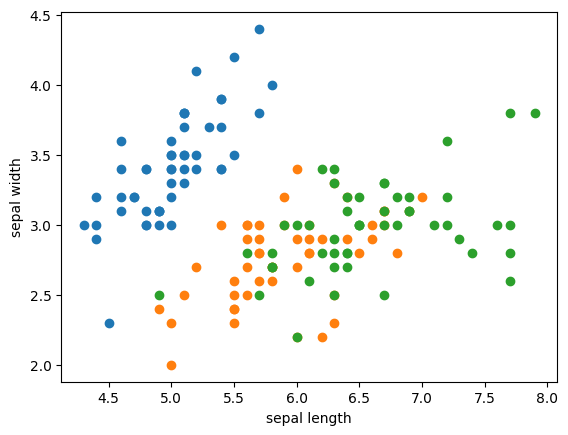

In [49]:
import matplotlib.pyplot as plt

for data_class in df["class"].unique():
    sub_df = df[df["class"] == data_class]
    plt.scatter(sub_df["sepal_length"], sub_df["sepal_width"])

plt.xlabel("sepal length")
plt.ylabel("sepal width")  
plt.show()

## Model Training

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(["petal_length", "petal_width", "class"], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,sepal_length,sepal_width
22,4.6,3.6
15,5.7,4.4
65,6.7,3.1
11,4.8,3.4
42,4.4,3.2
...,...,...
71,6.1,2.8
106,4.9,2.5
14,5.8,4.0
92,5.8,2.6


In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluation

In [31]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

## Plotting Decision Boundary

In [46]:
# Generate colors for each class
colors = {
    "Iris-setosa": "#1f77b4",
    "Iris-versicolor": "#ff7f0e",
    "Iris-virginica": "#2ca02c"
}
y_train_colors = y_train.map(colors)
y_train_colors

22     #1f77b4
15     #1f77b4
65     #ff7f0e
11     #1f77b4
42     #1f77b4
        ...   
71     #ff7f0e
106    #2ca02c
14     #1f77b4
92     #ff7f0e
102    #2ca02c
Name: class, Length: 120, dtype: object

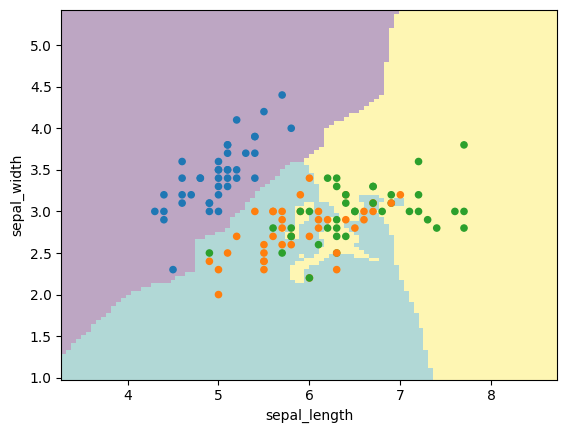

In [48]:
from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(1, 1)
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_train,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.35,
    ax=axs,
)
axs.scatter(X_train["sepal_length"], X_train["sepal_width"], c=y_train_colors, s=20)
plt.show()